In [1]:
from math import e

In [2]:
def sigmoid(z):
    return 1/(1+e**-z)

In [3]:
sigmoid(.0001)

0.5000249999999792

In [4]:
sigmoid(10000)

1.0

In [5]:
sigmoid(-1)

0.2689414213699951

In [7]:
sigmoid(-100)

3.7200759760208555e-44

In [8]:
sigmoid(0)

0.5

In [32]:
z = np.arange(0,10)

In [33]:
from matplotlib.plot as plt

ModuleNotFoundError: No module named 'matplotlib.plot'

In [9]:
import numpy as np
np.random.seed(42)

In [12]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 15s 1us/step


In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
X_test.shape

(10000, 28, 28)

In [21]:
X_train = X_train.reshape(60000, 28*28).astype('float32') / 255
X_test = X_test.reshape(10000, 28*28).astype('float32') / 255

In [22]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
y_test[0]

7

In [24]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [25]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [26]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

2024-02-29 10:40:24.736265: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-02-29 10:40:24.736305: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2024-02-29 10:40:24.736315: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2024-02-29 10:40:24.736380: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-29 10:40:24.736410: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=200,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/200


2024-02-29 12:28:30.181722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-29 12:28:30.191069: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


469/469 [==============================] - 3s 5ms/step - loss: 0.0917 - accuracy: 0.1011 - val_loss: 0.0910 - val_accuracy: 0.1103
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0906 - accuracy: 0.1297 - val_loss: 0.0903 - val_accuracy: 0.1512
Epoch 3/200
469/469 [==============================] - 4s 9ms/step - loss: 0.0900 - accuracy: 0.1803 - val_loss: 0.0897 - val_accuracy: 0.2027
Epoch 4/200
469/469 [==============================] - 3s 7ms/step - loss: 0.0895 - accuracy: 0.2211 - val_loss: 0.0892 - val_accuracy: 0.2393
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0890 - accuracy: 0.2539 - val_loss: 0.0888 - val_accuracy: 0.2707
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0887 - accuracy: 0.2882 - val_loss: 0.0884 - val_accuracy: 0.3113
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0883 - accuracy: 0.3259 - val_loss: 0.0881 - val_accuracy: 0.3500
Epoch 8/200

In [49]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15177577700940674400
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 11141494072103307976
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]


2024-02-29 12:37:06.400423: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-29 12:37:06.400487: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [50]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [52]:
with tf.device('/device:GPU:0'):
    model.fit(X_train, y_train,
          batch_size=128,
          epochs=200,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0280 - accuracy: 0.8629 - val_loss: 0.0270 - val_accuracy: 0.8714
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0279 - accuracy: 0.8633 - val_loss: 0.0269 - val_accuracy: 0.8715
Epoch 3/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.8636 - val_loss: 0.0268 - val_accuracy: 0.8719
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0277 - accuracy: 0.8639 - val_loss: 0.0267 - val_accuracy: 0.8727
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0276 - accuracy: 0.8641 - val_loss: 0.0266 - val_accuracy: 0.8731
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0275 - accuracy: 0.8645 - val_loss: 0.0265 - val_accuracy: 0.8733
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0274 - accuracy: 0.8646 - val_loss: 0.0264 - val_accuracy: 0.8738

In [108]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [109]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [110]:
X_train.shape

(60000, 28, 28)

In [111]:
y_train.shape

(60000,)

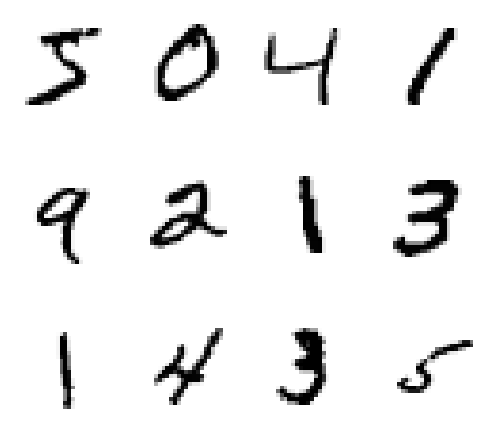

In [112]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [113]:
X_valid.shape

(10000, 28, 28)

In [114]:
X_train = X_train.reshape(60000, 28*28).astype('float32') / 255
X_valid = X_valid.reshape(10000, 28*28).astype('float32') / 255

In [115]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [116]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [117]:
model = Sequential()

# hidden layers
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [118]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [120]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 1.3963 - accuracy: 0.6037 - val_loss: 0.6732 - val_accuracy: 0.8427
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5435 - accuracy: 0.8595 - val_loss: 0.4365 - val_accuracy: 0.8842
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4218 - accuracy: 0.8831 - val_loss: 0.3761 - val_accuracy: 0.8973
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3794 - accuracy: 0.8928 - val_loss: 0.3479 - val_accuracy: 0.9026
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3572 - accuracy: 0.8993 - val_loss: 0.3307 - val_accuracy: 0.9076
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.3431 - accuracy: 0.9030 - val_loss: 0.3234 - val_accuracy: 0.9071
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3333 - accuracy: 0.9051 - val_loss: 0.3135 - val_accuracy: 0.9142
Epoch 